In [1]:
__author__ = "730163077"

In [2]:
%reload_ext autoreload
%autoreload 2

# Hypothesis: 
## I predict that more upperclassmen believe they will earn an A than first-year students. 

### First, we will read in the csv and convert it to a column-oriented data table.

In [3]:
DATA_DIRECTORY="../../data"
DATA_FILE_PATH=f"{DATA_DIRECTORY}/survey.csv"

from data_utils import read_csv_rows, columnar

data_rows: list[dict[str, str]] = read_csv_rows(DATA_FILE_PATH)
columns: dict[str, list[str]] = columnar(data_rows)

eqs': 'MATH 231, MATH 232, PSYC 210, STOR 155', 'prior_exp': 'None to less than one month!', 'AP_Principles': 'No', 'AP_A': 'No', 'other_comp': 'None', 'prior_time': 'None to less than one month!', 'languages': 'None', 'residency': 'In-state', 'on_campus': 'Yes', 'international': 'I am living in the United States', 'section': 'Section 1 - 3:30pm - Sync + Async', 'lesson_time': '6', 'sync_perf': '4', 'all_sync': '4', 'own_notes': '5', 'own_examples': '2', 'oh_visits': '1', 'ls_effective': '7', 'lsqs_effective': '7', 'programming_effective': '7', 'qz_effective': '7', 'oh_effective': '', 'tutoring_effective': '', 'kaki_effective': '6', 'pace': '6', 'difficulty': '6', 'understanding': '4', 'interested': '5', 'valuable': '6', 'grade': 'B', 'would_recommend': '7'}
{'row_number': '487', 'year': '21', 'unc_status': 'Returning UNC Student', 'comp_major': 'No', 'primary_major': 'Psychology', 'prereqs': 'MATH 130, MATH 231, PSYC 210', 'prior_exp': 'None to less than one month!', 'AP_Principles': 

### Now we will select the year and grade column. 

In [4]:
from data_utils import head, select

selection1: dict[str, list[str]] = select(columns, ["year"])
selection2: dict[str, list[str]] = select(columns, ["grade"])
print(selection1)

{'year': ['21', '23', '23', '23', '24', '22', '21', '23', '23', '23', '23', '24', '24', '24', '22', '24', '24', '23', '24', '22', '22', '24', '23', '23', '23', '22', '23', '24', '24', '24', '24', '24', '23', '24', '24', '23', '23', '24', '24', '22', '22', '22', '23', '22', '23', '24', '22', '24', '22', '24', '21', '24', '24', '24', '24', '23', '21', '24', '23', '23', '24', '24', '23', '24', '21', '24', '24', '22', '22', '24', '23', '24', '24', '23', '21', '24', '24', '24', '23', '22', '24', '24', '23', '24', '23', '23', '24', '24', '23', '23', '23', '24', '24', '24', '21', '23', '23', '23', '23', '24', '24', '24', '24', '24', '24', '24', '24', '22', '21', '24', '21', '24', '24', '24', '24', '23', '24', '22', '23', '22', '23', '23', '22', '23', '23', '23', '24', '24', '23', '22', '24', '24', '22', '24', '23', '24', '24', '23', '23', '23', '24', '24', '23', '24', '22', '21', '24', '22', '23', '24', '23', '24', '23', '22', '24', '24', '24', '24', '24', '24', '24', '22', '22', '24', '22', 

### We will count up the total number of people in each year and the total number of people for each grade believed to be earned.

In [5]:
from data_utils import count

year_counts: dict[str, int] = count(selection1["year"])
year_sorted_counts: dict[str, int] = dict(sorted(year_counts.items()))

print(f"year_counts: {year_sorted_counts}")
grade_counts: dict[str, int] = count(selection2["grade"])
print(f"grade_counts: {grade_counts}")

year_counts: {'21': 46, '22': 65, '23': 162, '24': 229}
grade_counts: {'A': 237, 'B': 211, 'C': 47, 'D': 7}


### We will use the counts to make a bar chart.

<BarContainer object of 4 artists>

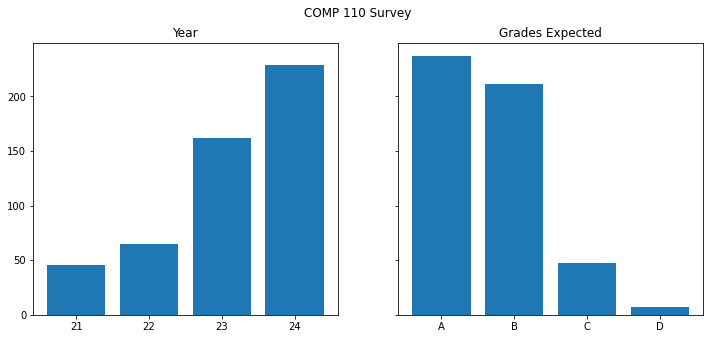

In [6]:
from matplotlib import pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)
fig.suptitle("COMP 110 Survey")


axes[0].set_title("Year")
axes[0].bar(year_sorted_counts.keys(), year_sorted_counts.values())

axes[1].set_title("Grades Expected")
axes[1].bar(grade_counts.keys(), grade_counts.values())

### This mask will produce True / False statements as a result of the year level the student is and whether they believe they will earn an A. 

In [7]:
def mask(column: list[str], string: str) -> list[bool]:
    """List of T/F statements about year and grade."""
    result: list[bool] = []
    for i in column:
         result.append(i == string)
    return result
mask1: list[bool] = mask(columns["year"], "24")
mask2: list[bool] = mask(columns["grade"], "A")
mask_senior: list[bool] = mask(columns["year"], "21")
mask_junior: list[bool] = mask(columns["year"], "22")
mask_soph: list[bool] = mask(columns["year"], "23")

mask2_counts: dict[str, int] = count(mask2)
print(f"Believe they will earn an A: {mask2_counts}")

mask1_counts: dict[str, int] = count(mask1)
print(f"They are a first-year: {mask1_counts}")
mask_senior_counts: dict[str, int] = count(mask_senior)
print(f"They are a senior: {mask_senior_counts}")
mask_junior_counts: dict[str, int] = count(mask_junior)
print(f"They are a junior: {mask_junior_counts}")
mask_soph_counts: dict[str, int] = count(mask_soph)
print(f"They are a sophomore: {mask_soph_counts}")

Believe they will earn an A: {True: 237, False: 265}
They are a first-year: {False: 273, True: 229}
They are a senior: {True: 46, False: 456}
They are a junior: {False: 437, True: 65}
They are a sophomore: {False: 340, True: 162}


### This use of mask will determine if the student is a first-year and whether they believe they will earn an A.

In [8]:
def masked0(column: list[str], mask1: list[bool], mask2: list[bool]) -> list[bool]:
    """List of T/F statements about grade and first-year."""
    result: list[bool] = []
    for i in range(len(column)):
        if mask1[i] and mask2[i]: 
            result.append(True)
        else:
            result.append(False)
    return result

mask3: list[bool] = masked0(columns["grade"], mask1, mask2)
mask3_counts: dict[str, int] = count(mask3)
print(f"Believe they will earn an A and are a first-year: {mask3_counts}")

Believe they will earn an A and are a first-year: {False: 367, True: 135}


### This use of mask will determine if the student is a senior and whether they believe they will earn an A.

In [9]:
def masked1(column: list[str], mask1: list[bool], mask2: list[bool]) -> list[bool]:
     """List of T/F statements about grade and seniors."""
     result: list[bool] = []
     for i in range(len(column)):
         if mask_senior[i] and mask2[i]: 
             result.append(True)
         else:
             result.append(False)
     return result

mask4: list[bool] = masked1(columns["grade"], mask_senior, mask2)
mask4_counts: dict[str, int] = count(mask4)
print(f"Believe they will earn an A and are a senior: {mask4_counts}")

Believe they will earn an A and are a senior: {True: 22, False: 480}


### This use of mask will determine if the student is a junior and whether they believe they will earn an A.

In [10]:
def masked2(column: list[str], mask1: list[bool], mask2: list[bool]) -> list[bool]:
     """List of T/F statements about grade and seniors."""
     result: list[bool] = []
     for i in range(len(column)):
         if mask_junior[i] and mask2[i]: 
             result.append(True)
         else:
             result.append(False)
     return result

mask5: list[bool] = masked2(columns["grade"], mask_junior, mask2)
mask5_counts: dict[str, int] = count(mask5)
print(f"Believe they will earn an A and are a junior: {mask5_counts}")

Believe they will earn an A and are a junior: {False: 478, True: 24}


### This use of mask will determine if the student is a sophomore and whether they believe they will earn an A.

In [11]:
def masked3(column: list[str], mask1: list[bool], mask2: list[bool]) -> list[bool]:
     """List of T/F statements about grade and seniors."""
     result: list[bool] = []
     for i in range(len(column)):
         if mask_soph[i] and mask2[i]: 
             result.append(True)
         else:
             result.append(False)
     return result

mask6: list[bool] = masked3(columns["grade"], mask_soph, mask2)
mask6_counts: dict[str, int] = count(mask6)
print(f"Believe they will earn an A and are a sophomore: {mask6_counts}")

Believe they will earn an A and are a sophomore: {False: 446, True: 56}


## We will make a pie chart to show the percentage of students who believe they will earn an A by year.

Text(0.5, 1.0, 'Percentage of people who think they will earn an A by year.')

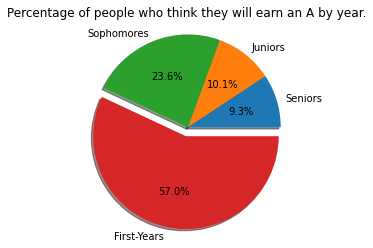

In [12]:
import matplotlib.pyplot as plt

labels = 'Seniors', 'Juniors', 'Sophomores', 'First-Years'
sizes = [22, 24, 56, 135]
explode = (0, 0, 0, 0.1) 

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=0)
ax1.axis('equal')
ax1.set_title("Percentage of people who think they will earn an A by year.")

# Conclusion: 
## There are 135 first-years who believe they will earn an A, while 102 upperclassmen who believe they will earn an A. I have disproved my hypothesis.
- 135 first-year students believe they will earn an A.
- 56 sophomores believe they will earn an A.
- 24 juniors believe they will earn an A.
- 22 seniors believe they will earn an A. 